In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

from math import log
import numpy as np
import pandas as pd
import pdb

In [2]:
benchmark_models = [
    "blasted_case47", "blasted_case110", "s820a_7_4", "s820a_15_7",
    "LoginService2.sk_23_36"
]

In [3]:
def shannon_entropy(c, l):
    p = c/l
    return -p*log(p, 2) - (1-p)*log(1-p, 2)

In [4]:
def get_entropy_hist(model, alg, m, M):
    entropy = list()  # number of 1s, for short
    with open(f"../memo/{model}.cnf.{alg}", 'r') as f:
        for line in f.readlines():
            entropy.append(shannon_entropy(line.count('1'), len(line)))
    y, x = np.histogram(entropy, bins=np.arange(m, M, (M-m)/10))
    y = y / len(entropy)
    return x[:-1], y

In [12]:
def plot_model(model_id, m, M):
    model = benchmark_models[model_id]
    fig, ax = plt.subplots()
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    x1, y1 = get_entropy_hist(model, 'qs', m, M)
    x2, y2 = get_entropy_hist(model, 'snap', m, M)
    l1 = ax.plot(x1, y1, 'x--', color='black')
    l2 = ax.plot(x2, y2, 'o--', color='red')
    ax.legend(('QuickSampler', 'SNAP'), loc='upper center')
    ax.set_xlabel('Solution(entropy)')
    ax.set_ylabel('Occurance(%)')
    ax.set_title(model)

    plt.savefig(f"{model_id}_uni.pdf")

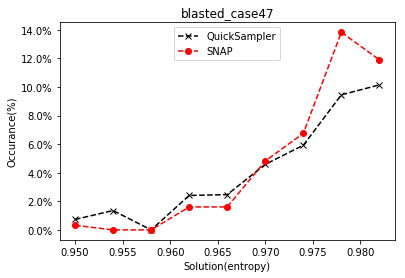

In [15]:
plot_model(0, 0.95, 0.99)

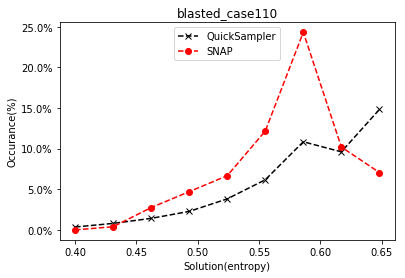

In [16]:
plot_model(1, 0.4, 0.71)

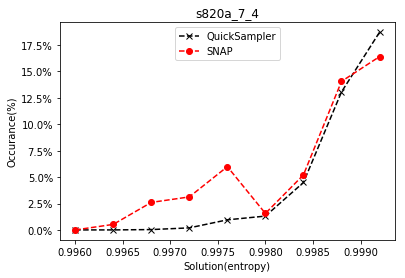

In [17]:
plot_model(2, 0.996, 1.0)

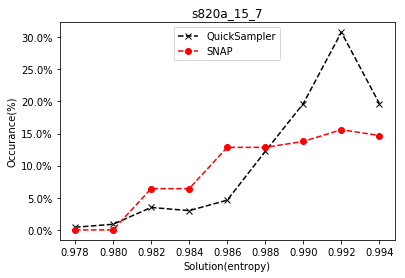

In [19]:
plot_model(3, 0.978, 0.998)

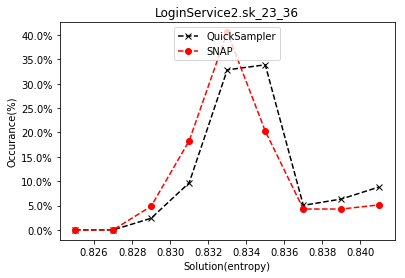

In [18]:
plot_model(4, 0.825, 0.845)